## Predict Droughts using Weather & Soil Data
### The US drought monitor is a measure of drought across the US manually created by experts using a wide range of data.

This datasets' aim is to help investigate if droughts could be predicted using only meteorological data, potentially leading to generalization of US predictions to other areas of the world.

This is a classification dataset over six levels of drought, which is no drought (None in the dataset), and five drought levels shown below.
Each entry is a drought level at a specific point in time in a specific US county, accompanied by the last 90 days of 18 meteorological indicators shown in the bottom of this description.

+ D0 - Abnormally Dry
+ D1 - Moderate Drought
+ D2 - Severe Drought
+ D3 - Extreme Drought
+ D4 - Exceptional Drought

## Meteorological Indicators (Features)
    1.WS10M_MIN - Minimum Wind Speed at 10 Meters(m/s)
    2.QV2M      - Specific Humidity at 2 Meters(g/kg)
    3.T2M_RANGE - Temperature Range at 2 Meters (C)
    4.WS10M     - Wind Speed at 10 Meters (m/s)
    5.T2M       - Temperature at 2 Meters (C)
    6.WS50M_MIN - Minimum Wind Speed at 50 Meters(m/s)
    7.T2M_MAX   - Maximum Temperature at 2 Meters(C)
    8.WS50M     - Wind Speed at 50 Meters (m/s)
    9.TS        - Earth Skin Temperature (C)
    10.WS50M_RANGE - Wind Speed Range at 50 Meters (m/s)
    11.WS50M_MAX   - Maximum Wind Speed at 50 Meters (m/s)
    12.WS10M_MAX   - Maximum Wind Speed at 10 Meters (m/s)
    13.WS10M_RANGE - Wind Speed Range at 10 Meters (m/s)
    14.PS          - Surface Pressure (kPa)
    15.T2MDEW      - Dew/Frost Point at 2 Meters (C)
    16.T2M_MIN     - Minimum Temperature at 2 Meters (C)
    17.T2MWET      - Wet Bulb Temperature at 2 Meters (C)
    18.PRECTOT     - Precipitation (mm day-1)
    
+ Label = score (Measure of drought ranging from 0 (no drought) to 5)
+ fips  = US county FIPS code

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import os
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

from sklearn import preprocessing
from sklearn import utils

In [ ]:
#pip install featurewiz

In [ ]:
#from featurewiz import featurewiz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/My Drive/3rd year/Second Sem/DSC3263/weather_solid/new_weather_solid/new_train.csv", low_memory=False)


In [ ]:
test = pd.read_csv("/content/drive/My Drive/3rd year/Second Sem/DSC3263/weather_solid/new_weather_solid/new_test.csv", low_memory=False)

In [ ]:
valid = pd.read_csv("/content/drive/My Drive/3rd year/Second Sem/DSC3263/weather_solid/new_weather_solid/new_valid.csv", low_memory=False)

In [ ]:
print(train.shape)
print(test.shape)
print(valid.shape)

(496800, 22)
(58480, 22)
(58400, 22)


In [ ]:
train.info()
#test.info()
#valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496800 entries, 0 to 496799
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   496800 non-null  int64  
 1   fips         496800 non-null  int64  
 2   date         496800 non-null  object 
 3   PRECTOT      496800 non-null  float64
 4   PS           496800 non-null  float64
 5   QV2M         496800 non-null  float64
 6   T2M          496800 non-null  float64
 7   T2MDEW       496800 non-null  float64
 8   T2MWET       496800 non-null  float64
 9   T2M_MAX      496800 non-null  float64
 10  T2M_MIN      496800 non-null  float64
 11  T2M_RANGE    496800 non-null  float64
 12  TS           496800 non-null  float64
 13  WS10M        496800 non-null  float64
 14  WS10M_MAX    496800 non-null  float64
 15  WS10M_MIN    496800 non-null  float64
 16  WS10M_RANGE  496800 non-null  float64
 17  WS50M        496800 non-null  float64
 18  WS50M_MAX    496800 non-

In [ ]:
pd.set_option('display.max_columns', None)
train.head()

,Unnamed: 0,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [ ]:
pd.set_option('display.max_columns', None)
train.tail()

,Unnamed: 0,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
496795,496795,4023,2016-12-27,0.00,87.81,4.02,10.01,-1.14,-1.19,21.64,1.25,20.40,9.21,4.11,7.01,0.40,6.61,5.82,9.29,0.67,8.61,1.1645
496796,496796,4023,2016-12-28,0.04,87.88,4.49,11.99,0.39,0.42,20.07,6.90,13.17,10.43,2.51,3.64,0.77,2.87,3.79,5.58,0.75,4.83,NaN
496797,496797,4023,2016-12-29,0.14,87.94,4.61,10.09,0.80,0.83,12.99,6.97,6.02,9.65,6.47,9.55,3.20,6.35,8.81,11.31,5.53,5.77,NaN
496798,496798,4023,2016-12-30,2.23,87.44,6.60,10.55,5.50,5.51,18.21,5.72,12.49,10.85,4.26,7.51,2.56,4.95,5.99,9.80,2.91,6.89,NaN
496799,496799,4023,2016-12-31,2.09,87.02,6.80,9.05,6.16,6.16,12.33,6.75,5.57,9.55,3.90,5.99,1.84,4.15,5.57,7.08,3.51,3.57,NaN


In [ ]:
pd.set_option('display.max_columns', None)
test.head()

,Unnamed: 0,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
1,1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,8.23,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,3.30,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,12.75,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,10.69,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN


In [ ]:
pd.set_option('display.max_columns', None)
test.tail()

,Unnamed: 0,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
58475,58475,4023,2020-12-27,0.00,87.27,3.25,12.23,-4.16,4.04,21.22,7.12,14.10,9.32,2.63,5.24,1.37,3.86,3.54,6.19,1.87,4.33,NaN
58476,58476,4023,2020-12-28,0.02,86.97,3.99,10.04,-1.36,4.34,17.47,3.45,14.02,9.55,6.23,11.54,2.37,9.17,9.24,13.82,4.42,9.40,NaN
58477,58477,4023,2020-12-29,0.52,87.14,4.37,4.65,0.02,2.33,9.18,-0.12,9.30,5.00,2.78,4.97,1.41,3.55,4.02,5.55,2.19,3.36,4.4252
58478,58478,4023,2020-12-30,0.00,87.40,2.68,3.18,-6.57,-1.70,10.52,-1.91,12.44,2.52,3.33,5.83,1.89,3.94,4.70,6.84,2.88,3.95,NaN
58479,58479,4023,2020-12-31,0.00,87.02,1.83,4.45,-11.56,-3.55,12.14,-2.50,14.63,3.49,2.53,3.67,1.12,2.55,3.48,4.99,1.60,3.39,NaN


In [ ]:
pd.set_option('display.max_columns', None)
valid.head()

,Unnamed: 0,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,0,1001,2017-01-01,32.50,100.02,10.47,14.69,14.47,14.47,17.68,10.53,7.15,14.63,2.14,2.71,1.52,1.19,4.40,5.96,2.25,3.71,NaN
1,1,1001,2017-01-02,63.52,100.04,12.75,17.96,17.75,17.75,20.30,16.14,4.16,17.85,2.75,4.31,1.60,2.71,5.50,8.16,4.05,4.11,NaN
2,2,1001,2017-01-03,18.82,99.69,9.74,14.24,13.44,13.44,18.48,9.29,9.20,14.06,2.25,3.73,1.64,2.09,4.80,7.27,2.54,4.72,2.0
3,3,1001,2017-01-04,0.01,100.02,5.21,8.10,3.86,3.88,11.74,2.12,9.62,8.08,2.63,3.95,1.34,2.60,4.98,6.16,3.36,2.80,NaN
4,4,1001,2017-01-05,0.01,99.89,4.54,5.91,2.20,2.22,13.07,-0.18,13.24,5.85,1.76,2.76,0.47,2.28,3.43,4.70,0.66,4.04,NaN


In [ ]:
pd.set_option('display.max_columns', None)
valid.tail()

,Unnamed: 0,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
58395,58395,4023,2018-12-27,4.48,86.81,3.79,4.11,-1.98,-2.23,11.20,-2.05,13.26,4.12,3.85,7.20,2.18,5.02,5.29,8.50,3.35,5.15,NaN
58396,58396,4023,2018-12-28,2.04,86.99,2.96,1.99,-5.26,-5.64,7.52,-3.36,10.88,2.13,3.67,5.65,2.54,3.11,5.10,6.27,3.84,2.43,NaN
58397,58397,4023,2018-12-29,0.28,87.45,2.54,-0.65,-7.20,-6.94,4.22,-4.47,8.70,-1.08,3.95,5.83,2.75,3.08,5.72,6.93,4.45,2.47,NaN
58398,58398,4023,2018-12-30,0.00,87.16,2.39,1.01,-8.10,-7.62,9.60,-4.27,13.87,1.07,3.67,6.34,1.53,4.81,5.61,7.88,1.77,6.12,NaN
58399,58399,4023,2018-12-31,3.85,86.85,3.82,3.32,-1.88,-2.36,9.56,-2.48,12.04,3.31,6.83,10.59,3.48,7.11,9.49,12.65,6.08,6.57,NaN


In [ ]:
#train.isnull().sum()
#test.isnull().sum()
valid.isnull().sum()

Unnamed: 0         0
fips               0
date               0
PRECTOT            0
PS                 0
QV2M               0
T2M                0
T2MDEW             0
T2MWET             0
T2M_MAX            0
T2M_MIN            0
T2M_RANGE          0
TS                 0
WS10M              0
WS10M_MAX          0
WS10M_MIN          0
WS10M_RANGE        0
WS50M              0
WS50M_MAX          0
WS50M_MIN          0
WS50M_RANGE        0
score          50080
dtype: int64

In [ ]:
#train.duplicated().sum()
#test.duplicated().sum()
valid.duplicated().sum()

0

In [ ]:
train = train.dropna()
test = test.dropna()
valid = valid.dropna()

In [ ]:
train.isnull().sum()
#test.isnull().sum()
#valid.isnull().sum()


Unnamed: 0     0
fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [ ]:
Grouped_fips = train.groupby(by = "fips").size()
print(Grouped_fips)

fips
1001    887
1003    887
1005    887
1007    887
1009    887
       ... 
4015    887
4017    887
4019    887
4021    887
4023    887
Length: 80, dtype: int64


In [ ]:
Grouped_fips = test.groupby(by = "fips").size()
print(Grouped_fips)

fips
1001    105
1003    105
1005    105
1007    105
1009    105
       ... 
4015    105
4017    105
4019    105
4021    105
4023    105
Length: 80, dtype: int64


In [ ]:
Grouped_fips = valid.groupby(by = "fips").size()
print(Grouped_fips)

fips
1001    104
1003    104
1005    104
1007    104
1009    104
       ... 
4015    104
4017    104
4019    104
4021    104
4023    104
Length: 80, dtype: int64


In [ ]:
train = train.drop(train.columns[[0,1,2]], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70960 entries, 3 to 496795
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PRECTOT      70960 non-null  float64
 1   PS           70960 non-null  float64
 2   QV2M         70960 non-null  float64
 3   T2M          70960 non-null  float64
 4   T2MDEW       70960 non-null  float64
 5   T2MWET       70960 non-null  float64
 6   T2M_MAX      70960 non-null  float64
 7   T2M_MIN      70960 non-null  float64
 8   T2M_RANGE    70960 non-null  float64
 9   TS           70960 non-null  float64
 10  WS10M        70960 non-null  float64
 11  WS10M_MAX    70960 non-null  float64
 12  WS10M_MIN    70960 non-null  float64
 13  WS10M_RANGE  70960 non-null  float64
 14  WS50M        70960 non-null  float64
 15  WS50M_MAX    70960 non-null  float64
 16  WS50M_MIN    70960 non-null  float64
 17  WS50M_RANGE  70960 non-null  float64
 18  score        70960 non-null  float64
dtypes: 

In [ ]:
test = test.drop(test.columns[[0,1,2]], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 0 to 58477
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PRECTOT      8400 non-null   float64
 1   PS           8400 non-null   float64
 2   QV2M         8400 non-null   float64
 3   T2M          8400 non-null   float64
 4   T2MDEW       8400 non-null   float64
 5   T2MWET       8400 non-null   float64
 6   T2M_MAX      8400 non-null   float64
 7   T2M_MIN      8400 non-null   float64
 8   T2M_RANGE    8400 non-null   float64
 9   TS           8400 non-null   float64
 10  WS10M        8400 non-null   float64
 11  WS10M_MAX    8400 non-null   float64
 12  WS10M_MIN    8400 non-null   float64
 13  WS10M_RANGE  8400 non-null   float64
 14  WS50M        8400 non-null   float64
 15  WS50M_MAX    8400 non-null   float64
 16  WS50M_MIN    8400 non-null   float64
 17  WS50M_RANGE  8400 non-null   float64
 18  score        8400 non-null   float64
dtypes: fl

In [ ]:
valid = valid.drop(valid.columns[[0,1,2]], axis=1)
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8320 entries, 2 to 58393
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PRECTOT      8320 non-null   float64
 1   PS           8320 non-null   float64
 2   QV2M         8320 non-null   float64
 3   T2M          8320 non-null   float64
 4   T2MDEW       8320 non-null   float64
 5   T2MWET       8320 non-null   float64
 6   T2M_MAX      8320 non-null   float64
 7   T2M_MIN      8320 non-null   float64
 8   T2M_RANGE    8320 non-null   float64
 9   TS           8320 non-null   float64
 10  WS10M        8320 non-null   float64
 11  WS10M_MAX    8320 non-null   float64
 12  WS10M_MIN    8320 non-null   float64
 13  WS10M_RANGE  8320 non-null   float64
 14  WS50M        8320 non-null   float64
 15  WS50M_MAX    8320 non-null   float64
 16  WS50M_MIN    8320 non-null   float64
 17  WS50M_RANGE  8320 non-null   float64
 18  score        8320 non-null   float64
dtypes: fl

## Distributions for Training and Test Sets

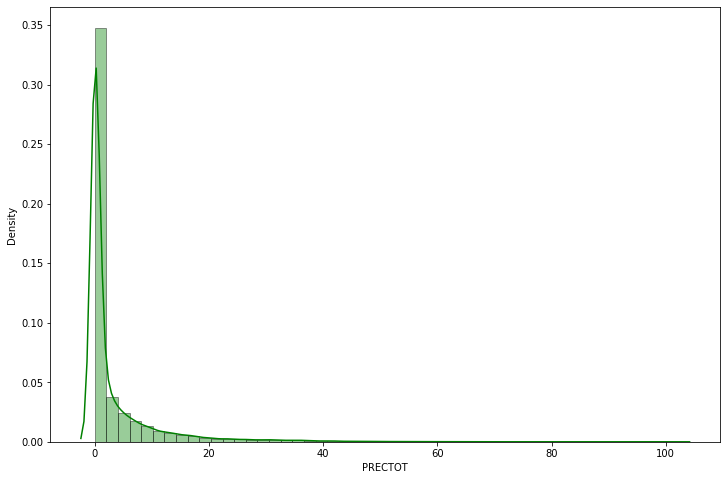

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.PRECTOT,color = "green",  hist_kws= {"edgecolor":"black"})
plt.show()

In [ ]:
train['score'].round().value_counts()


0.0    35824
1.0    12458
2.0     9257
3.0     7045
4.0     4056
5.0     2320
Name: score, dtype: int64

In [ ]:
Grouped_score = train.groupby(by = "score").size()
print(Grouped_score)

score
0.0000    30901
0.0001       29
0.0002       18
0.0003       10
0.0004       13
          ...  
4.9995        1
4.9997        1
4.9998        1
4.9999        3
5.0000     1488
Length: 13276, dtype: int64


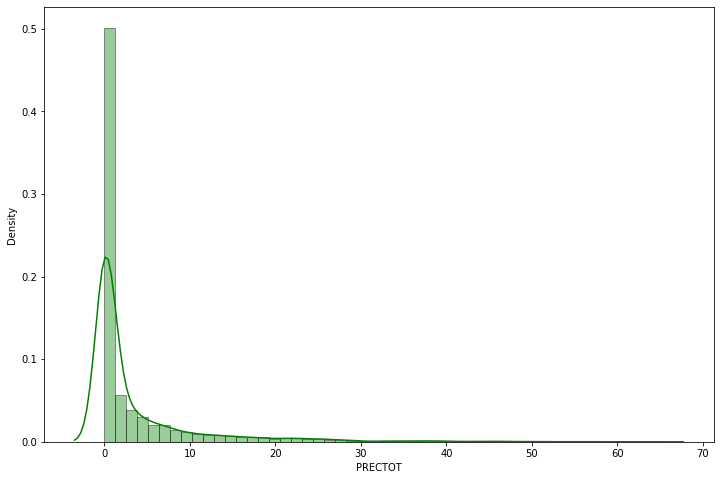

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.PRECTOT,color = "green",  hist_kws= {"edgecolor":"black"})
plt.show()

In [ ]:
#plt.rcParams["figure.figsize"] = [6, 6]
#plt.rcParams["figure.autolayout"] = True
#f, axes = plt.subplots(1, 2)

#sns.countplot(train.PRECTOT, x='PRECTOT', color="red", ax=axes[0])
#sns.countplot(test.PRECTOT, x="PRECTOT", color="green", ax=axes[1])
#plt.show()

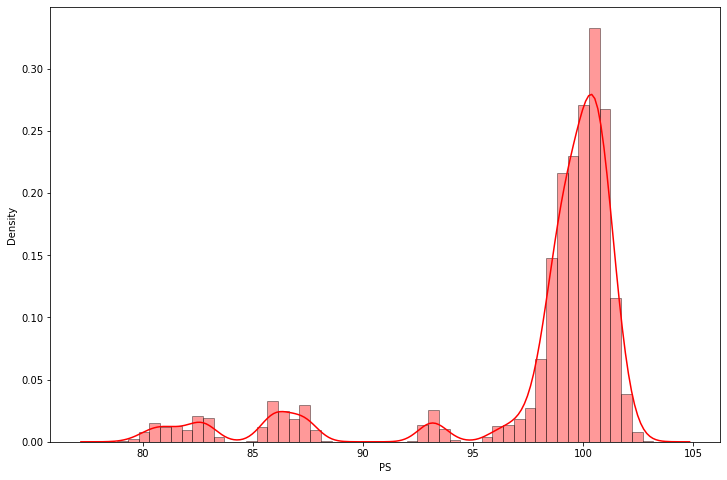

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.PS,color = "red",  hist_kws= {"edgecolor":"black"})
plt.show()

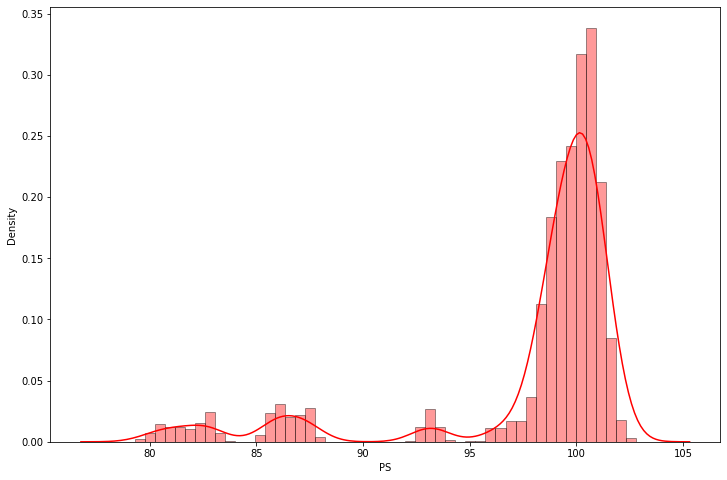

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.PS,color = "red",  hist_kws= {"edgecolor":"black"})
plt.show()

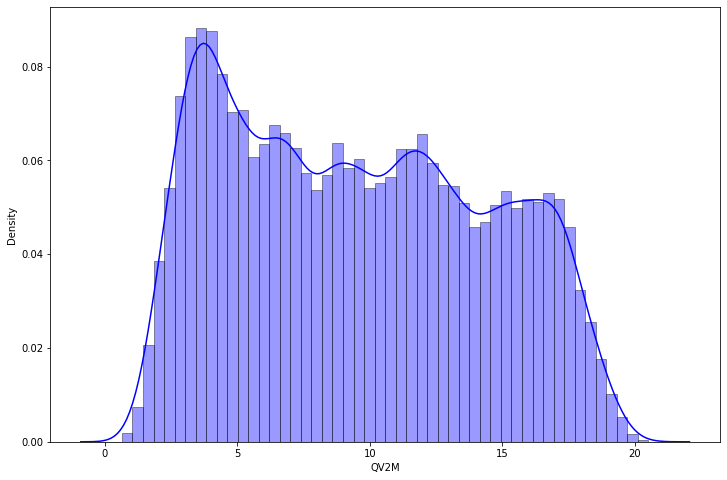

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.QV2M,color = "blue",  hist_kws= {"edgecolor":"black"})
plt.show()

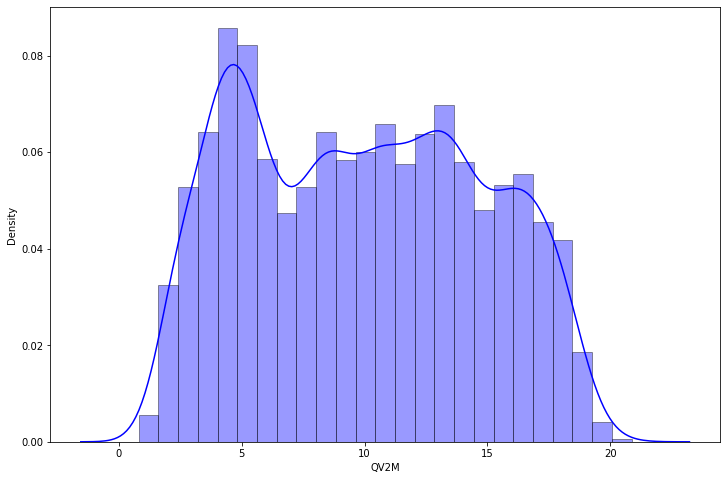

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.QV2M,color = "blue",  hist_kws= {"edgecolor":"black"})
plt.show()

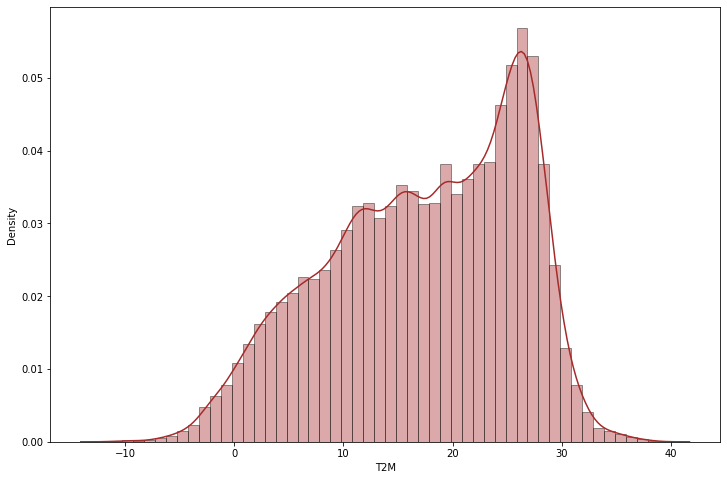

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.T2M,color = "brown",  hist_kws= {"edgecolor":"black"})
plt.show()

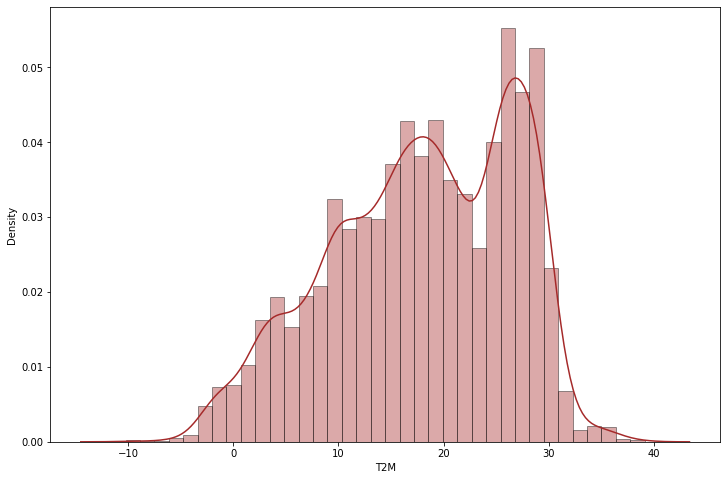

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.T2M,color = "brown",  hist_kws= {"edgecolor":"black"})
plt.show()

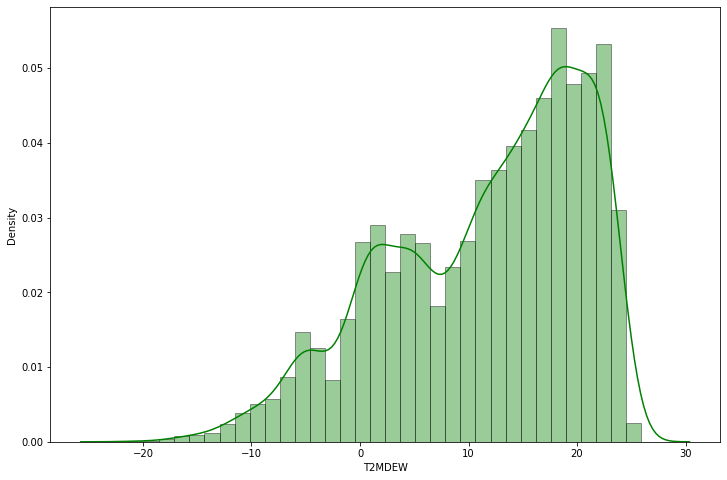

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.T2MDEW,color = "green",  hist_kws= {"edgecolor":"black"})
plt.show()

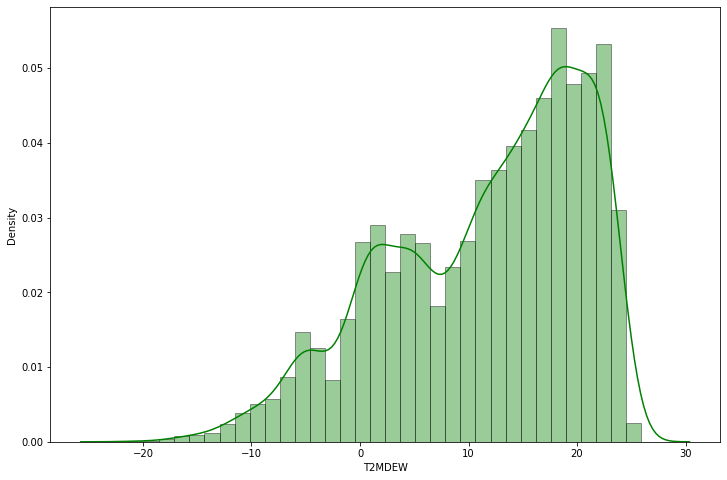

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.T2MDEW,color = "green",  hist_kws= {"edgecolor":"black"})
plt.show()

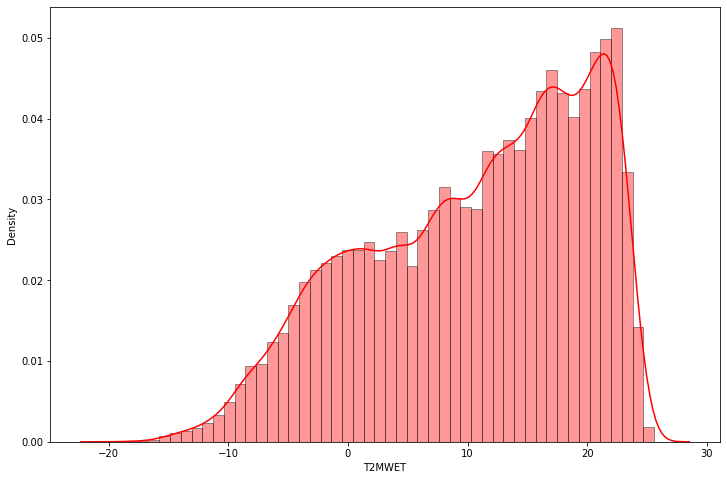

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.T2MWET,color = "red",  hist_kws= {"edgecolor":"black"})
plt.show()

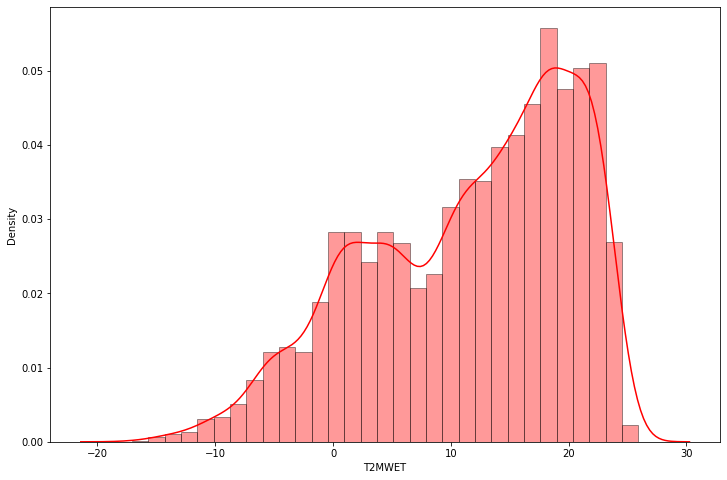

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.T2MWET,color = "red",  hist_kws= {"edgecolor":"black"})
plt.show()

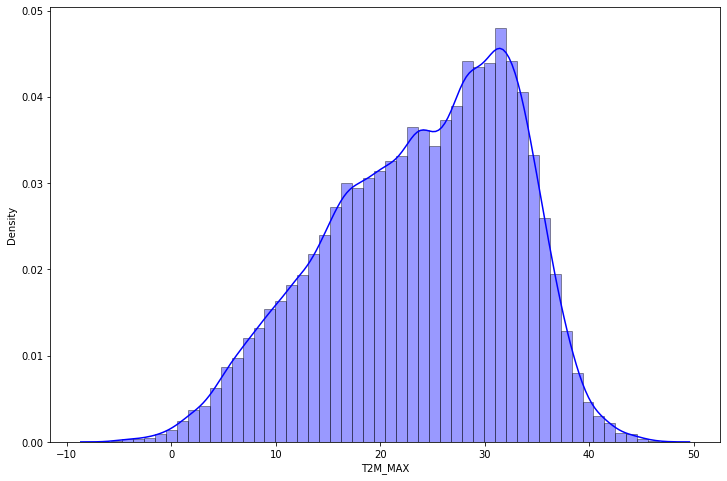

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.T2M_MAX,color = "blue",  hist_kws= {"edgecolor":"black"})
plt.show()

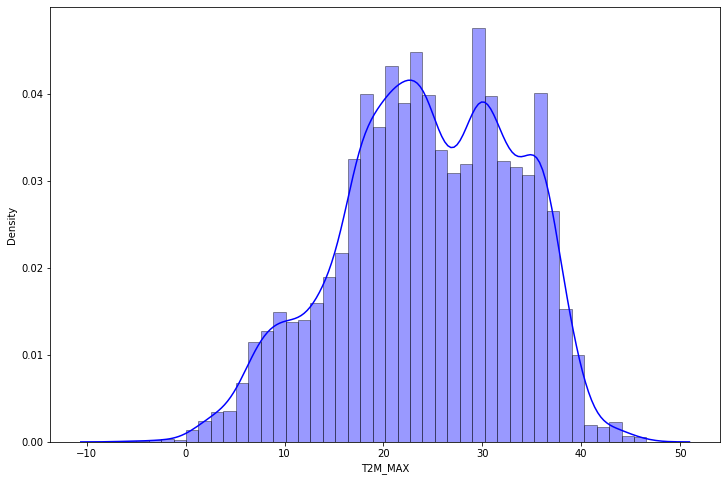

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.T2M_MAX,color = "blue",  hist_kws= {"edgecolor":"black"})
plt.show()

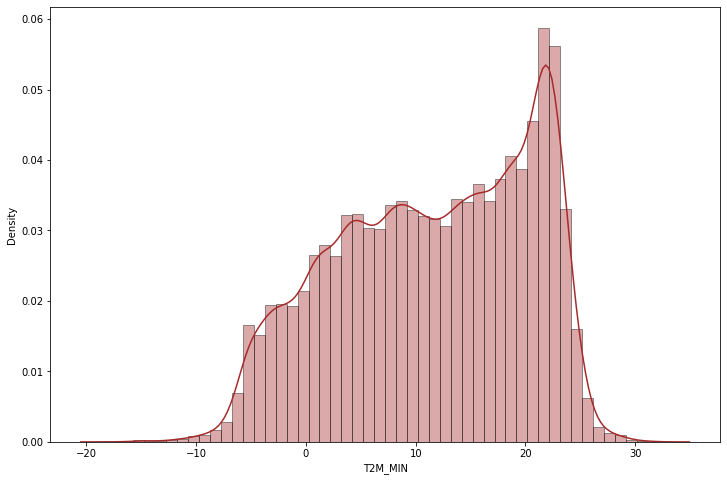

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.T2M_MIN,color = "brown",  hist_kws= {"edgecolor":"black"})
plt.show()

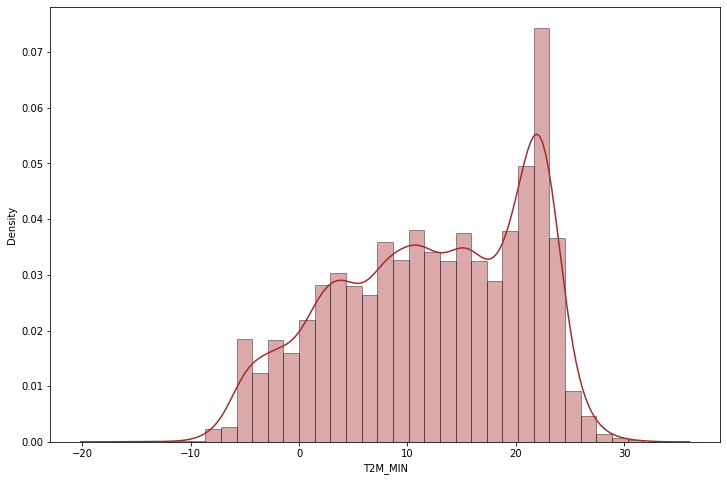

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.T2M_MIN,color = "brown",  hist_kws= {"edgecolor":"black"})
plt.show()

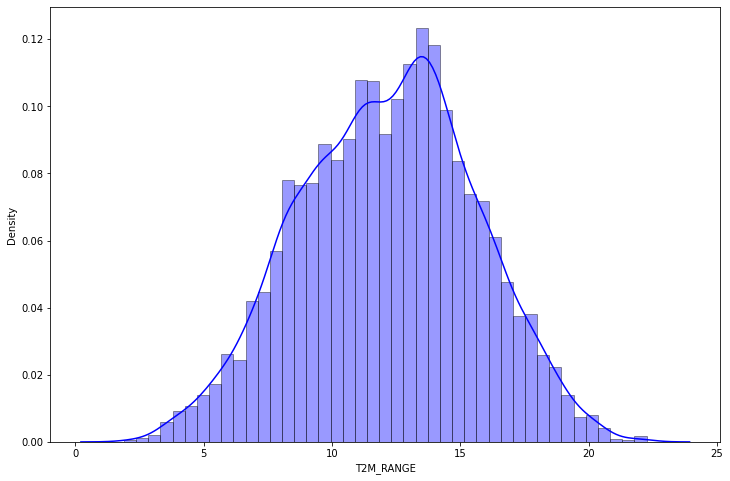

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.T2M_RANGE,color = "blue",  hist_kws= {"edgecolor":"black"})
plt.show()

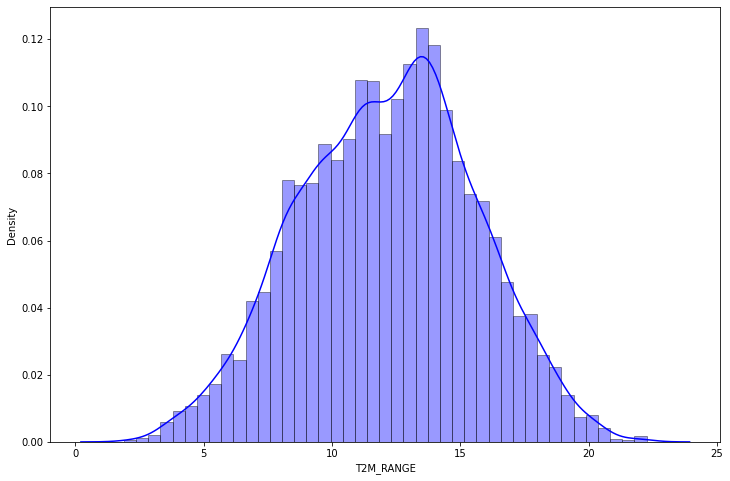

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.T2M_RANGE,color = "blue",  hist_kws= {"edgecolor":"black"})
plt.show()

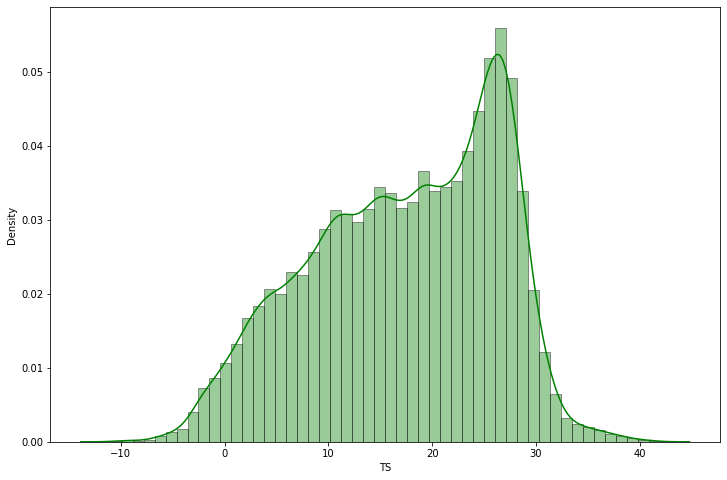

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.TS,color = "green",  hist_kws= {"edgecolor":"black"})
plt.show()

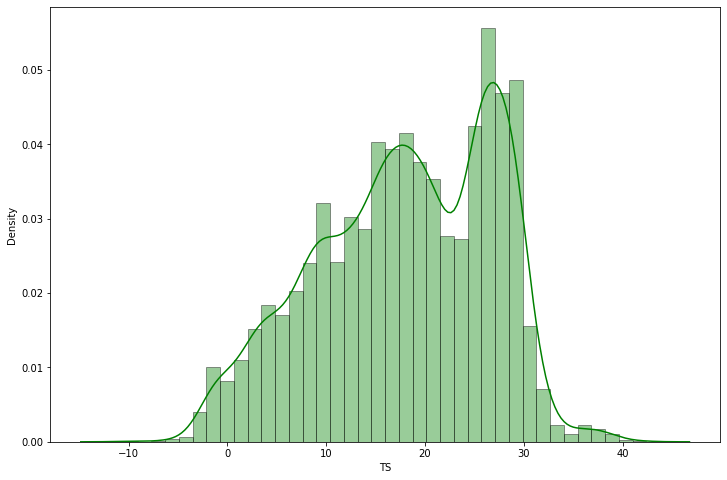

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.TS,color = "green",  hist_kws= {"edgecolor":"black"})
plt.show()

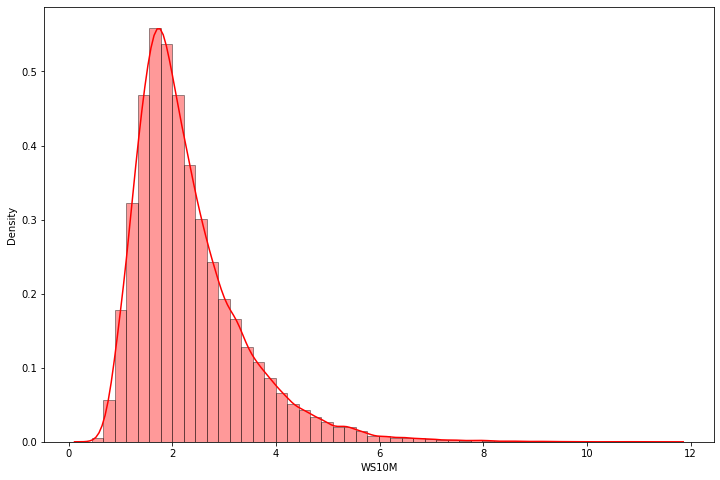

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.WS10M,color = "red",  hist_kws= {"edgecolor":"black"})
plt.show()

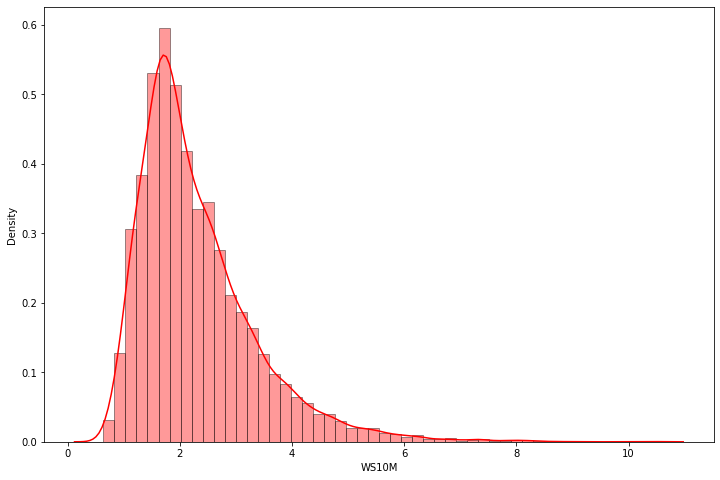

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.WS10M,color = "red",  hist_kws= {"edgecolor":"black"})
plt.show()

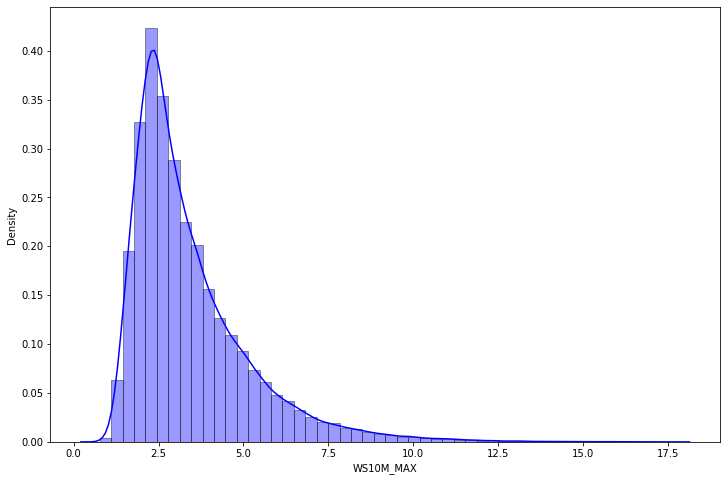

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.WS10M_MAX,color = "blue",  hist_kws= {"edgecolor":"black"})
plt.show()

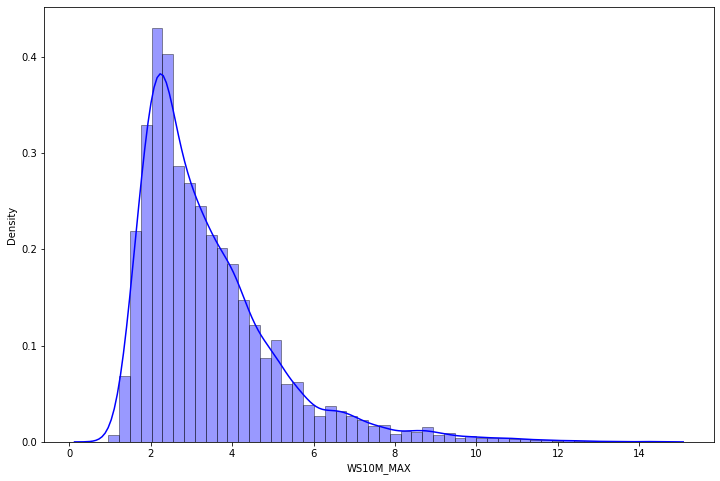

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.WS10M_MAX,color = "blue",  hist_kws= {"edgecolor":"black"})
plt.show()

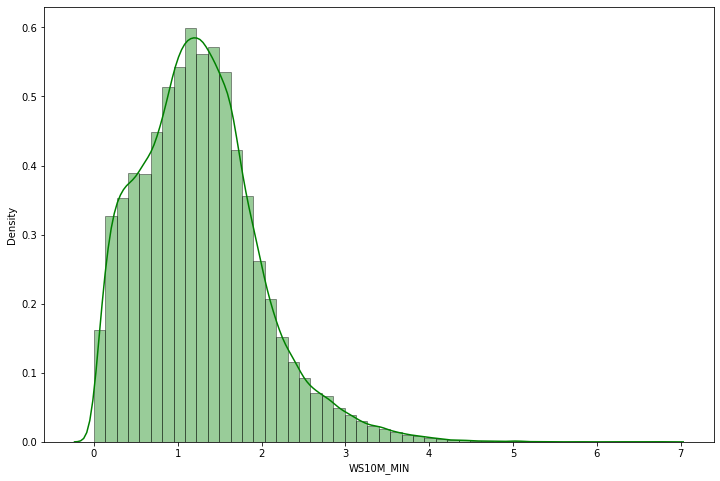

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.WS10M_MIN,color = "green",  hist_kws= {"edgecolor":"black"})
plt.show()

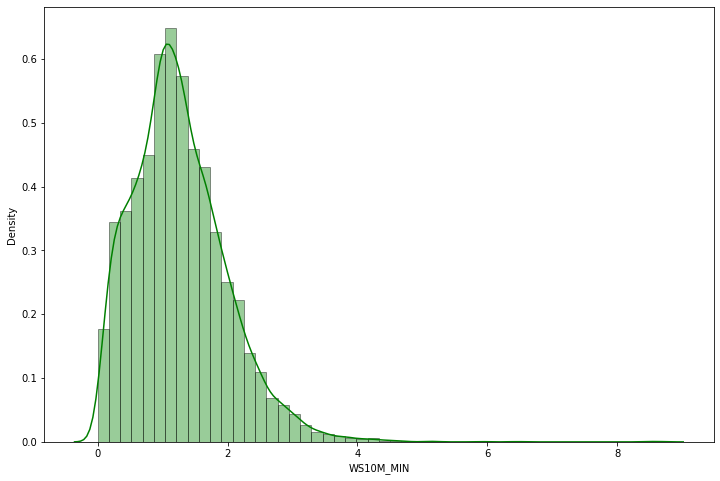

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.WS10M_MIN,color = "green",  hist_kws= {"edgecolor":"black"})
plt.show()

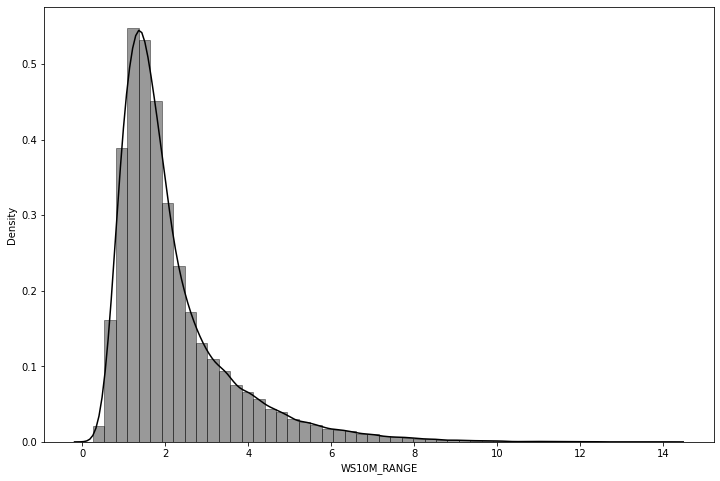

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.WS10M_RANGE,color = "black",  hist_kws= {"edgecolor":"black"})
plt.show()

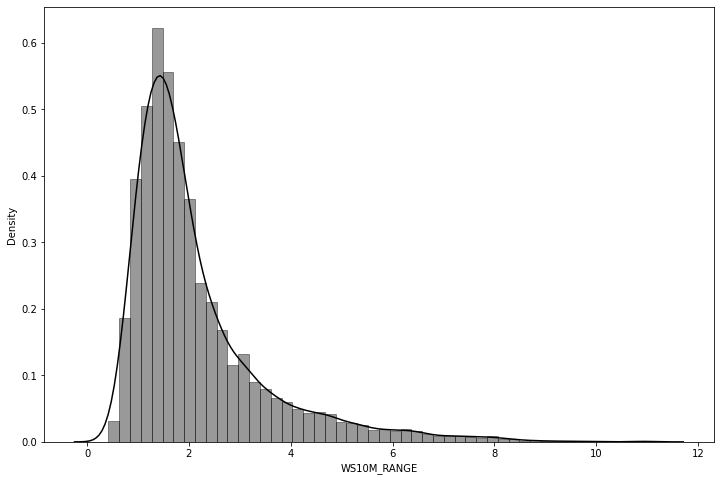

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.WS10M_RANGE,color = "black",  hist_kws= {"edgecolor":"black"})
plt.show()

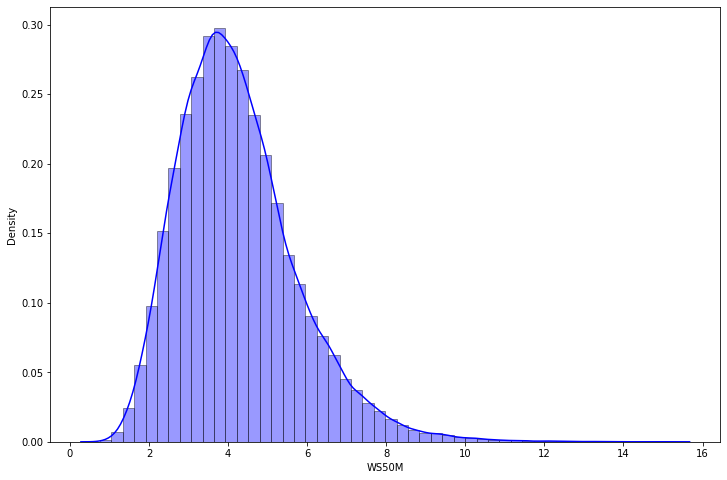

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.WS50M,color = "blue",  hist_kws= {"edgecolor":"black"})
plt.show()

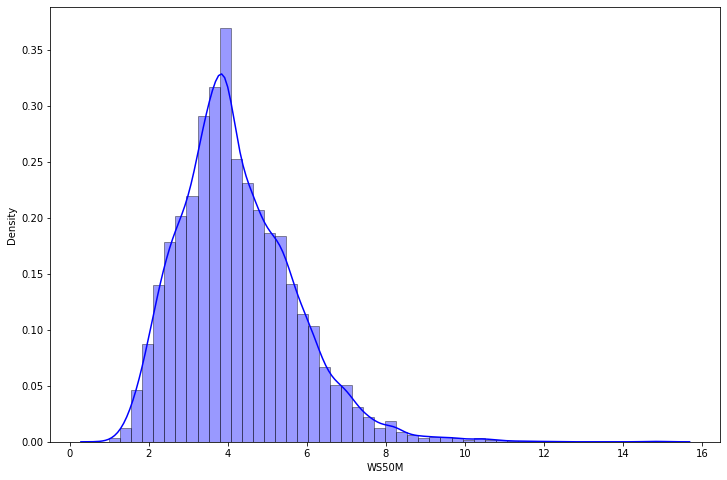

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.WS50M,color = "blue",  hist_kws= {"edgecolor":"black"})
plt.show()

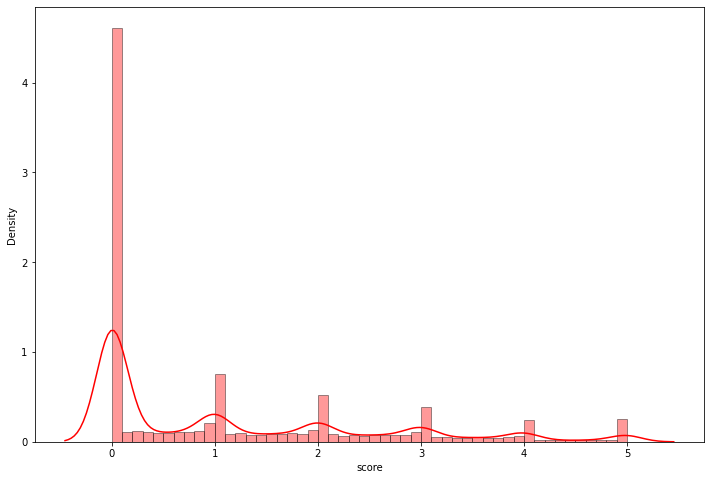

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.score,color = "red",  hist_kws= {"edgecolor":"black"})
plt.show()

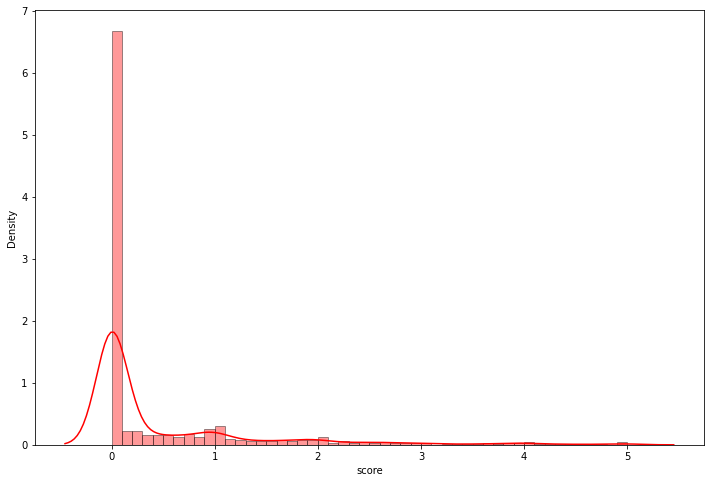

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = test.score,color = "red",  hist_kws= {"edgecolor":"black"})
plt.show()

In [ ]:
# Descriptive statistics for traninig set
display(train.describe()) # For numeric columns
#display(train.describe(include=['object'])) # For Categorical columns
print("\nSkewness: \n", train.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", train.kurtosis(axis = 0, skipna = True))

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000,70960.000000
mean,3.352449,97.993460,9.492328,17.383606,10.648867,10.680863,23.883698,11.586510,12.297162,17.384220,2.309869,3.422077,1.265568,2.156499,4.241606,6.105822,2.300395,3.805443,1.124971
std,7.500573,5.128746,4.836872,8.750971,9.278401,9.218770,9.001957,8.744518,3.605904,8.963001,1.049878,1.734270,0.718800,1.391515,1.501867,1.892417,1.449652,1.546091,1.411610
min,0.000000,78.830000,0.640000,-11.280000,-22.750000,-19.360000,-5.770000,-17.710000,1.460000,-10.980000,0.450000,0.770000,0.000000,0.260000,0.760000,1.230000,0.000000,0.520000,0.000000
25%,0.000000,98.640000,5.130000,10.880000,3.570000,3.580000,17.400000,4.570000,9.910000,10.620000,1.600000,2.240000,0.750000,1.260000,3.170000,4.880000,1.140000,2.710000,0.000000
50%,0.130000,99.790000,9.190000,18.480000,12.310000,12.310000,24.965000,12.370000,12.300000,18.430000,2.060000,2.920000,1.210000,1.730000,4.050000,5.780000,2.100000,3.580000,0.444050
75%,2.970000,100.630000,13.470000,24.990000,18.470000,18.470000,31.120000,19.390000,14.840000,25.100000,2.770000,4.120000,1.670000,2.570000,5.060000,6.880000,3.260000,4.590000,2.000000
max,101.770000,103.190000,20.510000,38.920000,25.580000,25.580000,46.720000,32.140000,25.250000,41.910000,11.520000,17.580000,6.800000,14.040000,15.190000,21.560000,10.860000,18.080000,5.000000



Skewness: 
 PRECTOT        3.951784
PS            -2.248846
QV2M           0.188720
T2M           -0.395320
T2MDEW        -0.504589
T2MWET        -0.484819
T2M_MAX       -0.412084
T2M_MIN       -0.297110
T2M_RANGE     -0.068032
TS            -0.345082
WS10M          1.638419
WS10M_MAX      1.829149
WS10M_MIN      0.835541
WS10M_RANGE    2.083058
WS50M          0.925491
WS50M_MAX      1.443734
WS50M_MIN      0.680665
WS50M_RANGE    1.312150
score          1.118601
dtype: float64

Kurtosis: 
 PRECTOT        21.641754
PS              3.830419
QV2M           -1.149193
T2M            -0.756909
T2MDEW         -0.724251
T2MWET         -0.775387
T2M_MAX        -0.531819
T2M_MIN        -0.977846
T2M_RANGE      -0.292646
TS             -0.757634
WS10M           4.344869
WS10M_MAX       4.786709
WS10M_MIN       1.521185
WS10M_RANGE     5.893590
WS50M           1.627798
WS50M_MAX       3.858505
WS50M_MIN       0.157039
WS50M_RANGE     3.612217
score           0.181840
dtype: float64


### Outlier Treatment

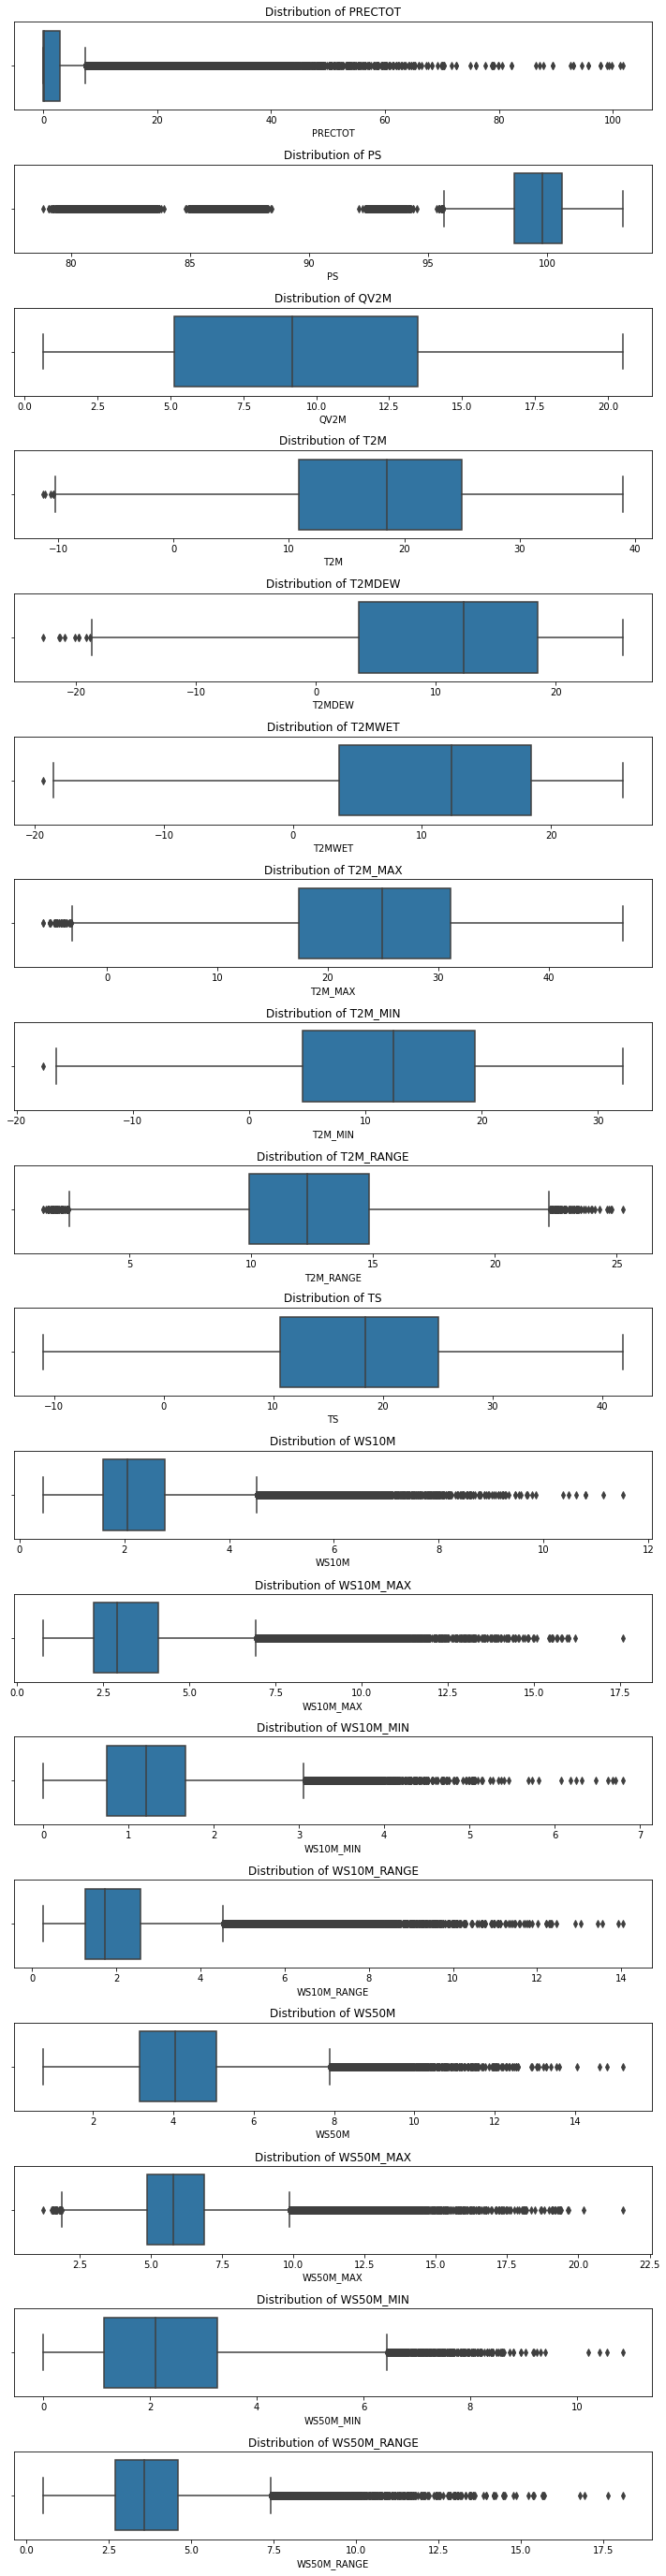

In [ ]:
plt.figure(figsize=(10,40))
for x in (range(1,19)):
    plt.subplot(19,1,x)
    sns.boxplot(x =  train.columns[x-1], data=train)
    x_name = train.columns[x-1]
    plt.title(f'Distribution of {x_name}')         
plt.tight_layout()

In [ ]:
print('Total rows = ',len(train.index))
for i in train.select_dtypes(exclude = ['object']).columns:
    print ('Number of values beyong standard outlier limit in ', i)
    print(len(train[(train[i] > train[i].mean() + 3*train[i].std()) | (train[i] < train[i].mean() - 3*train[i].std())]))

Total rows =  70960
Number of values beyong standard outlier limit in  PRECTOT
1933
Number of values beyong standard outlier limit in  PS
2547
Number of values beyong standard outlier limit in  QV2M
0
Number of values beyong standard outlier limit in  T2M
24
Number of values beyong standard outlier limit in  T2MDEW
29
Number of values beyong standard outlier limit in  T2MWET
10
Number of values beyong standard outlier limit in  T2M_MAX
49
Number of values beyong standard outlier limit in  T2M_MIN
18
Number of values beyong standard outlier limit in  T2M_RANGE
29
Number of values beyong standard outlier limit in  TS
14
Number of values beyong standard outlier limit in  WS10M
1101
Number of values beyong standard outlier limit in  WS10M_MAX
1301
Number of values beyong standard outlier limit in  WS10M_MIN
698
Number of values beyong standard outlier limit in  WS10M_RANGE
1482
Number of values beyong standard outlier limit in  WS50M
698
Number of values beyong standard outlier limit in  W

In [ ]:
train = train[(train['PRECTOT'] <= train['PRECTOT'].mean() + 3*train['PRECTOT'].std()) &
        (train['PRECTOT'] >= train['PRECTOT'].mean() - 3*train['PRECTOT'].std())]

train = train[(train['PS'] <= train['PS'].mean() + 3*train['PS'].std()) &
        (train['PS'] >= train['PS'].mean() - 3*train['PS'].std())]

train = train[(train['QV2M'] <= train['QV2M'].mean() + 3*train['QV2M'].std()) &
        (train['QV2M'] >= train['QV2M'].mean() - 3*train['QV2M'].std())]

train = train[(train['T2M'] <= train['T2M'].mean() + 3*train['T2M'].std()) &
        (train['T2M'] >= train['T2M'].mean() - 3*train['T2M'].std())]

train = train[(train['T2MDEW'] <= train['T2MDEW'].mean() + 3*train['T2MDEW'].std()) &
        (train['T2MDEW'] >= train['T2MDEW'].mean() - 3*train['T2MDEW'].std())]

train = train[(train['T2MWET'] <= train['T2MWET'].mean() + 3*train['T2MWET'].std()) &
        (train['T2MWET'] >= train['T2MWET'].mean() - 3*train['T2MWET'].std())]

train = train[(train['T2M_MAX'] <= train['T2M_MAX'].mean() + 3*train['T2M_MAX'].std()) &
        (train['T2M_MAX'] >= train['T2M_MAX'].mean() - 3*train['T2M_MAX'].std())]

train = train[(train['T2M_MIN'] <= train['T2M_MIN'].mean() + 3*train['T2M_MIN'].std()) &
        (train['T2M_MIN'] >= train['T2M_MIN'].mean() - 3*train['T2M_MIN'].std())]

train = train[(train['T2M_RANGE'] <= train['T2M_RANGE'].mean() + 3*train['T2M_RANGE'].std()) &
        (train['T2M_RANGE'] >= train['T2M_RANGE'].mean() - 3*train['T2M_RANGE'].std())]

train = train[(train['TS'] <= train['TS'].mean() + 3*train['TS'].std()) &
        (train['TS'] >= train['TS'].mean() - 3*train['TS'].std())]

train = train[(train['WS10M'] <= train['WS10M'].mean() + 3*train['WS10M'].std()) &
        (train['WS10M'] >= train['WS10M'].mean() - 3*train['WS10M'].std())]

train = train[(train['WS10M_MAX'] <= train['WS10M_MAX'].mean() + 3*train['WS10M_MAX'].std()) &
        (train['WS10M_MAX'] >= train['WS10M_MAX'].mean() - 3*train['WS10M_MAX'].std())]

train = train[(train['WS10M_MIN'] <= train['WS10M_MIN'].mean() + 3*train['WS10M_MIN'].std()) &
        (train['WS10M_MIN'] >= train['WS10M_MIN'].mean() - 3*train['WS10M_MIN'].std())]

train = train[(train['WS10M_RANGE'] <= train['WS10M_RANGE'].mean() + 3*train['WS10M_RANGE'].std()) &
        (train['WS10M_RANGE'] >= train['WS10M_RANGE'].mean() - 3*train['WS10M_RANGE'].std())]

train = train[(train['WS50M'] <= train['WS50M'].mean() + 3*train['WS50M'].std()) &
        (train['WS50M'] >= train['WS50M'].mean() - 3*train['WS50M'].std())]

train = train[(train['WS50M_MAX'] <= train['WS50M_MAX'].mean() + 3*train['WS50M_MAX'].std()) &
        (train['WS50M_MAX'] >= train['WS50M_MAX'].mean() - 3*train['WS50M_MAX'].std())]

train = train[(train['WS50M_MIN'] <= train['WS50M_MIN'].mean() + 3*train['WS50M_MIN'].std()) &
        (train['WS50M_MIN'] >= train['WS50M_MIN'].mean() - 3*train['WS50M_MIN'].std())]

train = train[(train['WS50M_RANGE'] <= train['WS50M_RANGE'].mean() + 3*train['WS50M_RANGE'].std()) &
        (train['WS50M_RANGE'] >= train['WS50M_RANGE'].mean() - 3*train['WS50M_RANGE'].std())]

print('Total rows = ',len(train.index))

Total rows =  62285


In [ ]:
print('Total rows = ',len(test.index))
for i in test.select_dtypes(exclude = ['object']).columns:
    print ('Number of values beyong standard outlier limit in ', i)
    print(len(test[(test[i] > test[i].mean() + 3*test[i].std()) | (test[i] < test[i].mean() - 3*test[i].std())]))

Total rows =  8400
Number of values beyong standard outlier limit in  PRECTOT
232
Number of values beyong standard outlier limit in  PS
306
Number of values beyong standard outlier limit in  QV2M
0
Number of values beyong standard outlier limit in  T2M
2
Number of values beyong standard outlier limit in  T2MDEW
17
Number of values beyong standard outlier limit in  T2MWET
7
Number of values beyong standard outlier limit in  T2M_MAX
5
Number of values beyong standard outlier limit in  T2M_MIN
2
Number of values beyong standard outlier limit in  T2M_RANGE
1
Number of values beyong standard outlier limit in  TS
2
Number of values beyong standard outlier limit in  WS10M
138
Number of values beyong standard outlier limit in  WS10M_MAX
177
Number of values beyong standard outlier limit in  WS10M_MIN
73
Number of values beyong standard outlier limit in  WS10M_RANGE
199
Number of values beyong standard outlier limit in  WS50M
77
Number of values beyong standard outlier limit in  WS50M_MAX
124
N

In [ ]:
test = test[(test['PRECTOT'] <= test['PRECTOT'].mean() + 3*test['PRECTOT'].std()) &
        (test['PRECTOT'] >= test['PRECTOT'].mean() - 3*test['PRECTOT'].std())]

test = test[(test['PS'] <= test['PS'].mean() + 3*test['PS'].std()) &
        (test['PS'] >= test['PS'].mean() - 3*test['PS'].std())]

test = test[(test['QV2M'] <= test['QV2M'].mean() + 3*test['QV2M'].std()) &
        (test['QV2M'] >= test['QV2M'].mean() - 3*test['QV2M'].std())]

test = test[(test['T2M'] <= test['T2M'].mean() + 3*test['T2M'].std()) &
        (test['T2M'] >= test['T2M'].mean() - 3*test['T2M'].std())]

test = test[(test['T2MDEW'] <= test['T2MDEW'].mean() + 3*test['T2MDEW'].std()) &
        (test['T2MDEW'] >= test['T2MDEW'].mean() - 3*test['T2MDEW'].std())]

test = test[(test['T2MWET'] <= test['T2MWET'].mean() + 3*test['T2MWET'].std()) &
        (test['T2MWET'] >= test['T2MWET'].mean() - 3*test['T2MWET'].std())]

test = test[(test['T2M_MAX'] <= test['T2M_MAX'].mean() + 3*test['T2M_MAX'].std()) &
        (test['T2M_MAX'] >= test['T2M_MAX'].mean() - 3*test['T2M_MAX'].std())]

test = test[(test['T2M_MIN'] <= test['T2M_MIN'].mean() + 3*test['T2M_MIN'].std()) &
        (test['T2M_MIN'] >= test['T2M_MIN'].mean() - 3*test['T2M_MIN'].std())]

test = test[(test['T2M_RANGE'] <= test['T2M_RANGE'].mean() + 3*test['T2M_RANGE'].std()) &
        (test['T2M_RANGE'] >= test['T2M_RANGE'].mean() - 3*test['T2M_RANGE'].std())]

test = test[(test['TS'] <= test['TS'].mean() + 3*test['TS'].std()) &
        (test['TS'] >= test['TS'].mean() - 3*test['TS'].std())]

test = test[(test['WS10M'] <= test['WS10M'].mean() + 3*test['WS10M'].std()) &
        (test['WS10M'] >= test['WS10M'].mean() - 3*test['WS10M'].std())]

test = test[(test['WS10M_MAX'] <= test['WS10M_MAX'].mean() + 3*test['WS10M_MAX'].std()) &
        (test['WS10M_MAX'] >= test['WS10M_MAX'].mean() - 3*test['WS10M_MAX'].std())]

test = test[(test['WS10M_MIN'] <= test['WS10M_MIN'].mean() + 3*test['WS10M_MIN'].std()) &
        (test['WS10M_MIN'] >= test['WS10M_MIN'].mean() - 3*test['WS10M_MIN'].std())]

test = test[(test['WS10M_RANGE'] <= test['WS10M_RANGE'].mean() + 3*test['WS10M_RANGE'].std()) &
        (test['WS10M_RANGE'] >= test['WS10M_RANGE'].mean() - 3*test['WS10M_RANGE'].std())]

test = test[(test['WS50M'] <= test['WS50M'].mean() + 3*test['WS50M'].std()) &
        (test['WS50M'] >= test['WS50M'].mean() - 3*test['WS50M'].std())]

test = test[(test['WS50M_MAX'] <= test['WS50M_MAX'].mean() + 3*test['WS50M_MAX'].std()) &
        (test['WS50M_MAX'] >= test['WS50M_MAX'].mean() - 3*test['WS50M_MAX'].std())]

test = test[(test['WS50M_MIN'] <= test['WS50M_MIN'].mean() + 3*test['WS50M_MIN'].std()) &
        (test['WS50M_MIN'] >= test['WS50M_MIN'].mean() - 3*test['WS50M_MIN'].std())]

test = test[(test['WS50M_RANGE'] <= test['WS50M_RANGE'].mean() + 3*test['WS50M_RANGE'].std()) &
        (test['WS50M_RANGE'] >= test['WS50M_RANGE'].mean() - 3*test['WS50M_RANGE'].std())]

print('Total rows = ',len(test.index))

Total rows =  7364


In [ ]:
print('Total rows = ',len(valid.index))
for i in valid.select_dtypes(exclude = ['object']).columns:
    print ('Number of values beyong standard outlier limit in ', i)
    print(len(valid[(valid[i] > valid[i].mean() + 3*valid[i].std()) | (valid[i] < valid[i].mean() - 3*valid[i].std())]))

Total rows =  8320
Number of values beyong standard outlier limit in  PRECTOT
220
Number of values beyong standard outlier limit in  PS
298
Number of values beyong standard outlier limit in  QV2M
0
Number of values beyong standard outlier limit in  T2M
17
Number of values beyong standard outlier limit in  T2MDEW
15
Number of values beyong standard outlier limit in  T2MWET
4
Number of values beyong standard outlier limit in  T2M_MAX
30
Number of values beyong standard outlier limit in  T2M_MIN
13
Number of values beyong standard outlier limit in  T2M_RANGE
6
Number of values beyong standard outlier limit in  TS
7
Number of values beyong standard outlier limit in  WS10M
121
Number of values beyong standard outlier limit in  WS10M_MAX
151
Number of values beyong standard outlier limit in  WS10M_MIN
76
Number of values beyong standard outlier limit in  WS10M_RANGE
179
Number of values beyong standard outlier limit in  WS50M
74
Number of values beyong standard outlier limit in  WS50M_MAX
91

In [ ]:
valid = valid[(valid['PRECTOT'] <= valid['PRECTOT'].mean() + 3*valid['PRECTOT'].std()) &
        (valid['PRECTOT'] >= valid['PRECTOT'].mean() - 3*valid['PRECTOT'].std())]

valid = valid[(valid['PS'] <= valid['PS'].mean() + 3*valid['PS'].std()) &
        (valid['PS'] >= valid['PS'].mean() - 3*valid['PS'].std())]

valid = valid[(valid['QV2M'] <= valid['QV2M'].mean() + 3*valid['QV2M'].std()) &
        (valid['QV2M'] >= valid['QV2M'].mean() - 3*valid['QV2M'].std())]

valid = valid[(valid['T2M'] <= valid['T2M'].mean() + 3*valid['T2M'].std()) &
        (valid['T2M'] >= valid['T2M'].mean() - 3*valid['T2M'].std())]

valid = valid[(valid['T2MDEW'] <= valid['T2MDEW'].mean() + 3*valid['T2MDEW'].std()) &
        (valid['T2MDEW'] >= valid['T2MDEW'].mean() - 3*valid['T2MDEW'].std())]

valid = valid[(valid['T2MWET'] <= valid['T2MWET'].mean() + 3*valid['T2MWET'].std()) &
        (valid['T2MWET'] >= valid['T2MWET'].mean() - 3*valid['T2MWET'].std())]

valid = valid[(valid['T2M_MAX'] <= valid['T2M_MAX'].mean() + 3*valid['T2M_MAX'].std()) &
        (valid['T2M_MAX'] >= valid['T2M_MAX'].mean() - 3*valid['T2M_MAX'].std())]

valid = valid[(valid['T2M_MIN'] <= valid['T2M_MIN'].mean() + 3*valid['T2M_MIN'].std()) &
        (valid['T2M_MIN'] >= valid['T2M_MIN'].mean() - 3*valid['T2M_MIN'].std())]

valid = valid[(valid['T2M_RANGE'] <= valid['T2M_RANGE'].mean() + 3*valid['T2M_RANGE'].std()) &
        (valid['T2M_RANGE'] >= valid['T2M_RANGE'].mean() - 3*valid['T2M_RANGE'].std())]

valid = valid[(valid['TS'] <= valid['TS'].mean() + 3*valid['TS'].std()) &
        (valid['TS'] >= valid['TS'].mean() - 3*valid['TS'].std())]

valid = valid[(valid['WS10M'] <= valid['WS10M'].mean() + 3*valid['WS10M'].std()) &
        (valid['WS10M'] >= valid['WS10M'].mean() - 3*valid['WS10M'].std())]

valid = valid[(valid['WS10M_MAX'] <= valid['WS10M_MAX'].mean() + 3*valid['WS10M_MAX'].std()) &
        (valid['WS10M_MAX'] >= valid['WS10M_MAX'].mean() - 3*valid['WS10M_MAX'].std())]

valid = valid[(valid['WS10M_MIN'] <= valid['WS10M_MIN'].mean() + 3*valid['WS10M_MIN'].std()) &
        (valid['WS10M_MIN'] >= valid['WS10M_MIN'].mean() - 3*valid['WS10M_MIN'].std())]

valid = valid[(valid['WS10M_RANGE'] <= valid['WS10M_RANGE'].mean() + 3*valid['WS10M_RANGE'].std()) &
        (valid['WS10M_RANGE'] >= valid['WS10M_RANGE'].mean() - 3*valid['WS10M_RANGE'].std())]

valid = valid[(valid['WS50M'] <= valid['WS50M'].mean() + 3*valid['WS50M'].std()) &
        (valid['WS50M'] >= valid['WS50M'].mean() - 3*valid['WS50M'].std())]

valid = valid[(valid['WS50M_MAX'] <= valid['WS50M_MAX'].mean() + 3*valid['WS50M_MAX'].std()) &
        (valid['WS50M_MAX'] >= valid['WS50M_MAX'].mean() - 3*valid['WS50M_MAX'].std())]

valid = valid[(valid['WS50M_MIN'] <= valid['WS50M_MIN'].mean() + 3*valid['WS50M_MIN'].std()) &
        (valid['WS50M_MIN'] >= valid['WS50M_MIN'].mean() - 3*valid['WS50M_MIN'].std())]

valid = valid[(valid['WS50M_RANGE'] <= valid['WS50M_RANGE'].mean() + 3*valid['WS50M_RANGE'].std()) &
        (valid['WS50M_RANGE'] >= valid['WS50M_RANGE'].mean() - 3*valid['WS50M_RANGE'].std())]

print('Total rows = ',len(valid.index))

Total rows =  7341


In [ ]:
xtrain = train.drop('score', axis=1)
ytrain = train.iloc[:, -1]

In [ ]:
ytrain.head()

3     1.0
10    2.0
17    2.0
24    2.0
31    1.0
Name: score, dtype: float64

In [ ]:
xtest = test.drop('score', axis=1)
ytest = test.iloc[:, -1]

In [ ]:
#xtrain = train.iloc[:, [1, 2, 3, 4, 6, 7, 8, 9, 10, 13, 14, 15, 17]]
#ytrain = train.iloc[:, -1]
xtrain = train.iloc[:, [1, 8, 9]]
ytrain = train.iloc[:, -1]

In [ ]:
#xtest = test.iloc[:, [1, 2, 3, 4, 6, 7, 8, 9, 10, 13, 14, 15, 17]]
#ytest = test.iloc[:, -1]
xtest = test.iloc[:, [1, 8, 9]]
ytest = test.iloc[:, -1]

In [ ]:
print("Train features shape", xtrain.shape)
print("Train target shape", ytrain.shape)
print("Test features shape", xtest.shape)
print("Test target shape", ytest.shape)

Train features shape (62285, 3)
Train target shape (62285,)
Test features shape (7364, 3)
Test target shape (7364,)


In [ ]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)
xtrain

array([[ 0.36299912,  1.0717856 , -0.71740136],
       [ 0.39241508,  0.26813675, -0.81628894],
       [ 0.3897409 , -0.92568944, -0.39376927],
       ...,
       [-3.19633231, -0.15989361, -1.34780968],
       [-3.16156799,  0.17496007, -1.13542613],
       [-3.03855578,  0.18369539, -0.70841158]])

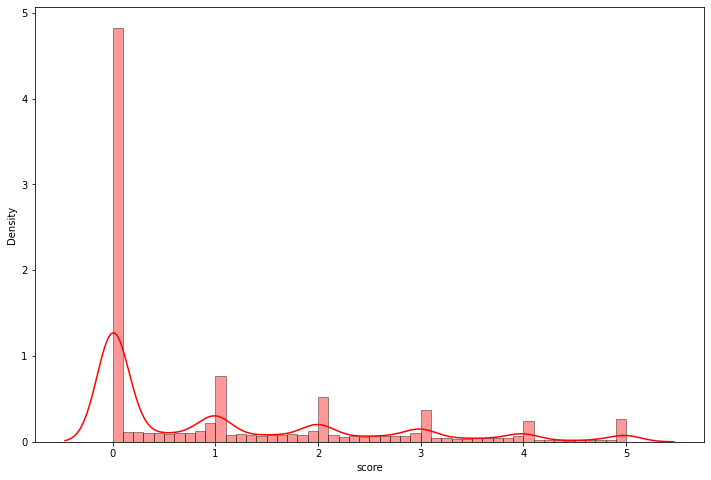

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(a = train.score,color = "red",  hist_kws= {"edgecolor":"black"})
plt.show()

In [ ]:
lab = preprocessing.LabelEncoder()


In [ ]:
#model = RandomForestClassifier(n_estimators=10) # n_estimators is the hyperparameter
#rfe = RFE(model, n_features_to_select=15) # n_features_to_select is chosen on a trial and error basis
#fit = rfe.fit(xtrain, ytrain)
#print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
#print("Feature Ranking: %s" % (fit.ranking_))
#selected_features = independent_variables.columns[(fit.get_support())]
#print(selected_features)

In [ ]:
#target = 'score'
 
#features, train = featurewiz(train, target, corr_limit=0.7, verbose=0, sep=",",
#header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
train.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
3,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
10,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,1.76,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2.0
17,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,2.63,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2.0
24,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,3.35,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2.0
31,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,2.03,2.74,0.88,1.86,4.18,6.38,1.27,5.11,1.0


In [ ]:
#xtrain = train.drop(['score'],axis=1)
#ytrain = train['score']

In [ ]:
#xtrain.head()
#ytrain.head()

In [ ]:
#xtrain =  StandardScaler().fit_transform(xtrain)

In [ ]:
clasifier = DecisionTreeClassifier(criterion='entropy' , random_state = 40)

In [ ]:
ytrain = lab.fit_transform(ytrain)

In [ ]:
model = clasifier.fit(xtrain, ytrain)

In [ ]:
#xtest = test.iloc[:, [1, 8, 9]]
#ytest = test.iloc[:, -1]

In [ ]:
y_predict = model.predict(xtest) 

In [ ]:
xtest.shape

(7364, 3)

In [ ]:
xtrain.shape

(62285, 3)

In [ ]:
model.tree_.max_depth

23

In [ ]:
ytest = lab.fit_transform(ytest)
metrics.accuracy_score(ytest, y_predict)

0.3092069527430744

In [ ]:
precision_score(ytest, y_predict, pos_label = 'positive', average = 'micro')

0.5904399782726779

In [ ]:
recall_score(ytest, y_predict, pos_label = 'positive', average = 'micro')

0.5904399782726779

In [ ]:
f1_score(ytest, y_predict, pos_label = 'positive', average = 'micro')

0.5904399782726779

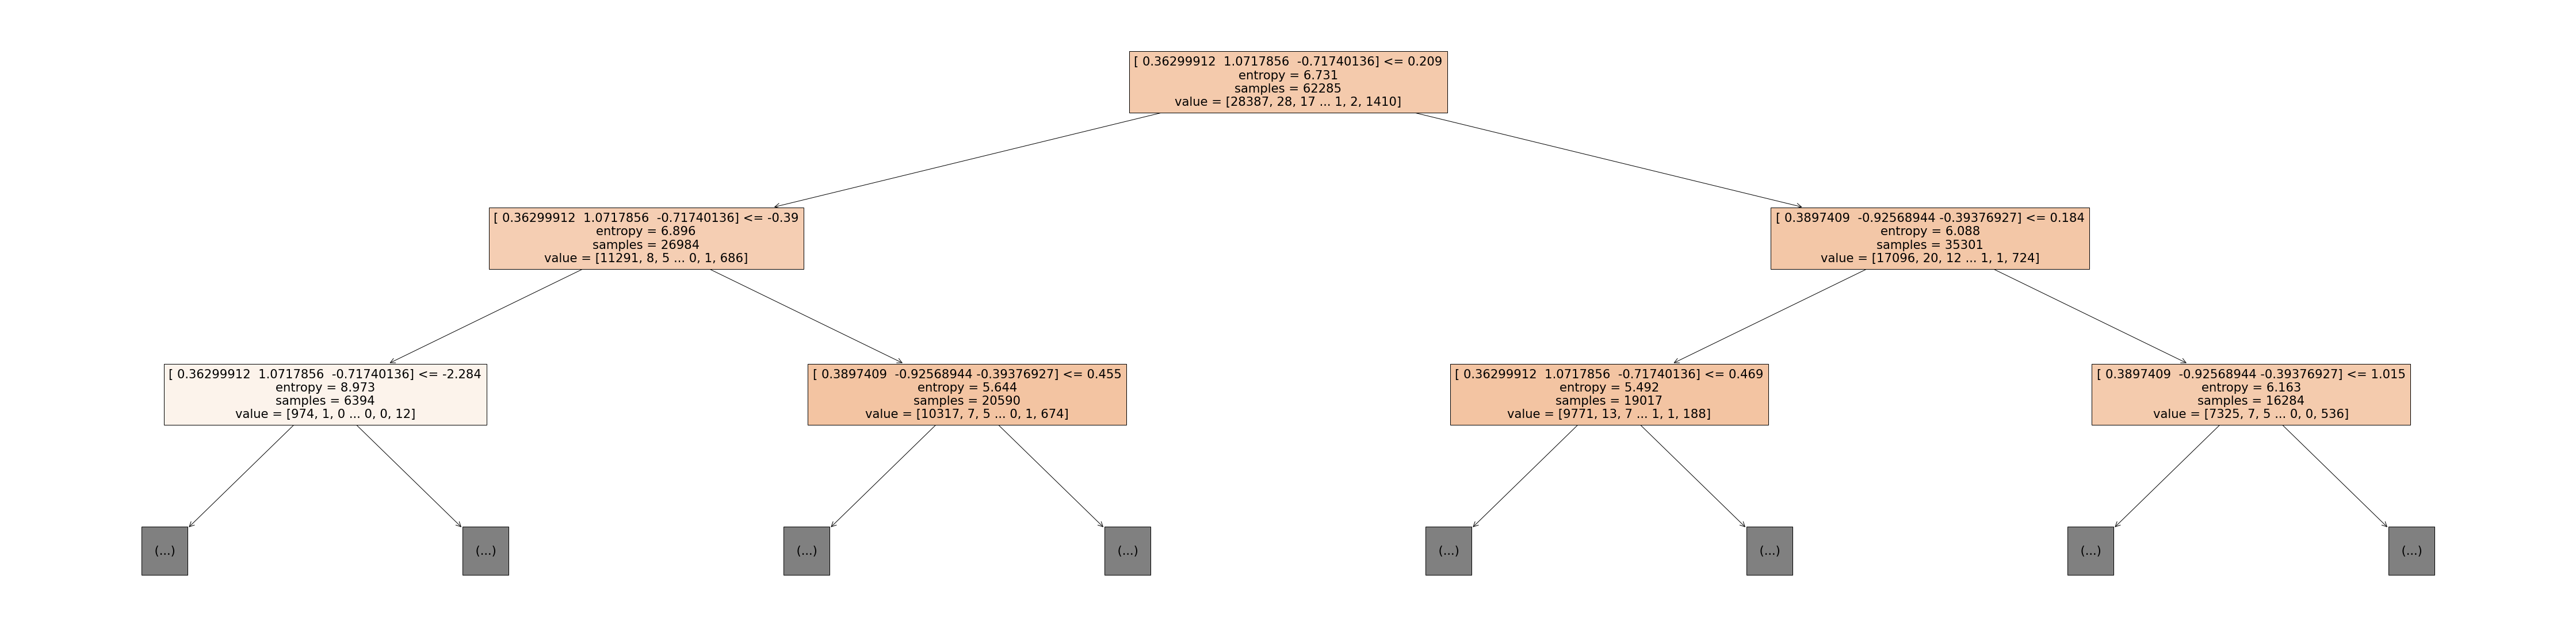

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(model, feature_names=xtrain, max_depth=2, filled=True);

In [ ]:
for max_d in range(1,21):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(xtrain, ytrain)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(xtrain, ytrain))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(xtest,ytest))
  print('')